<a href="https://colab.research.google.com/github/Jidnya28/Diabetes-Prediction/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Introduction

So what is diabetes and what leads to someone getting it? The following is from the Centers for Disease Control and Prevention (CDC).  

Insulin is a hormone made by your pancreas that acts like a key to let blood sugar into the cells in your body for use as energy. If you have type 2 diabetes, cells don’t respond normally to insulin; this is called insulin resistance. Your pancreas makes more insulin to try to get cells to respond. Eventually your pancreas can’t keep up, and your blood sugar rises, setting the stage for prediabetes and type 2 diabetes. High blood sugar is damaging to the body and can cause other serious health problems, such as heart disease, vision loss, and kidney disease.

Type 2 diabetes symptoms often develop over several years and can go on for a long time without being noticed (sometimes there aren’t any noticeable symptoms at all). Because symptoms can be hard to spot, it’s important to know the risk factors and to see your doctor to get your blood sugar tested if you have any of them.

The data set we will be using is the PIMA Indian Diabetes data set. The PIMA Indians are a tribe in Arizona and more about their history can be found here https://en.wikipedia.org/wiki/Pima_people

The data set consist of females over the age of 21. There are a total of 9 features including outcome, which is what we will be trying to predict

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function(A function that scores the likelihood of diabetes based on family history)
8. Age (years)
9. Outcome (0 or 1)

# Importing libraries

In [115]:
#Importing the necessary python libraries
import numpy as np
import pandas as pd

# Creating the dataset

In [116]:
#Creating the data
diabetes_data = pd.read_csv(r'/content/diabetes.csv')

In [117]:
#Reading the dataset
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [118]:
#Observing the shape of dataframe

print(diabetes_data.shape)

(768, 9)


As it is observed above that we have 768 rows and 9 columns.   
The first 8 columns represent the features and the last column represent the target/label.

# Basic EDA & statistical analysis

Exploratory Data Analysis or EDA , is an important step to be performed in Data Science projects.
EDA is generally the process of visualising datasets to find out different patterns in the datasets, analyzing the anomalies behaviour of the datasets and building assumptions or hypothesis based on the understanding of the data

In [119]:
# Using the describe we will try and gain more insights of our data:
#for descriptive statistics of the data
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [120]:
#For complete information about the data
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [121]:
#for datatypes in the data
diabetes_data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [122]:
#Finding missing values
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [123]:
#To check if there are any special characters in place of values
for i in diabetes_data.columns:
    print({i:diabetes_data[i].unique()})

{'Pregnancies': array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])}
{'Glucose': array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])}
{'BloodPressure': array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,

There are no missing values or any unique values available in the data but, there are some values which are termed as zero(0).
From the above columns some columns such as-
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI,  
have zero values which does not make any sense as these values can't be 0.  
So,we will consider these zero values as missing values.  

It is better to replace zeros with NaN since after that counting them would be easier and zeros need to be replaced with some suitable values.


In [124]:
import warnings
warnings.filterwarnings("ignore")
diabetes_data_df = diabetes_data.copy(deep = True)
diabetes_data_df[['Glucose','BloodPressure',
                    'SkinThickness','Insulin','BMI']] = diabetes_data_df[['Glucose','BloodPressure','SkinThickness',
                                                                            'Insulin','BMI']].replace(0,np.nan)

## showing the count of Nans
print(diabetes_data_df.isnull().sum()/len(diabetes_data_df)*100)

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


To fill up these NaN values understanding the data distribution is necessary

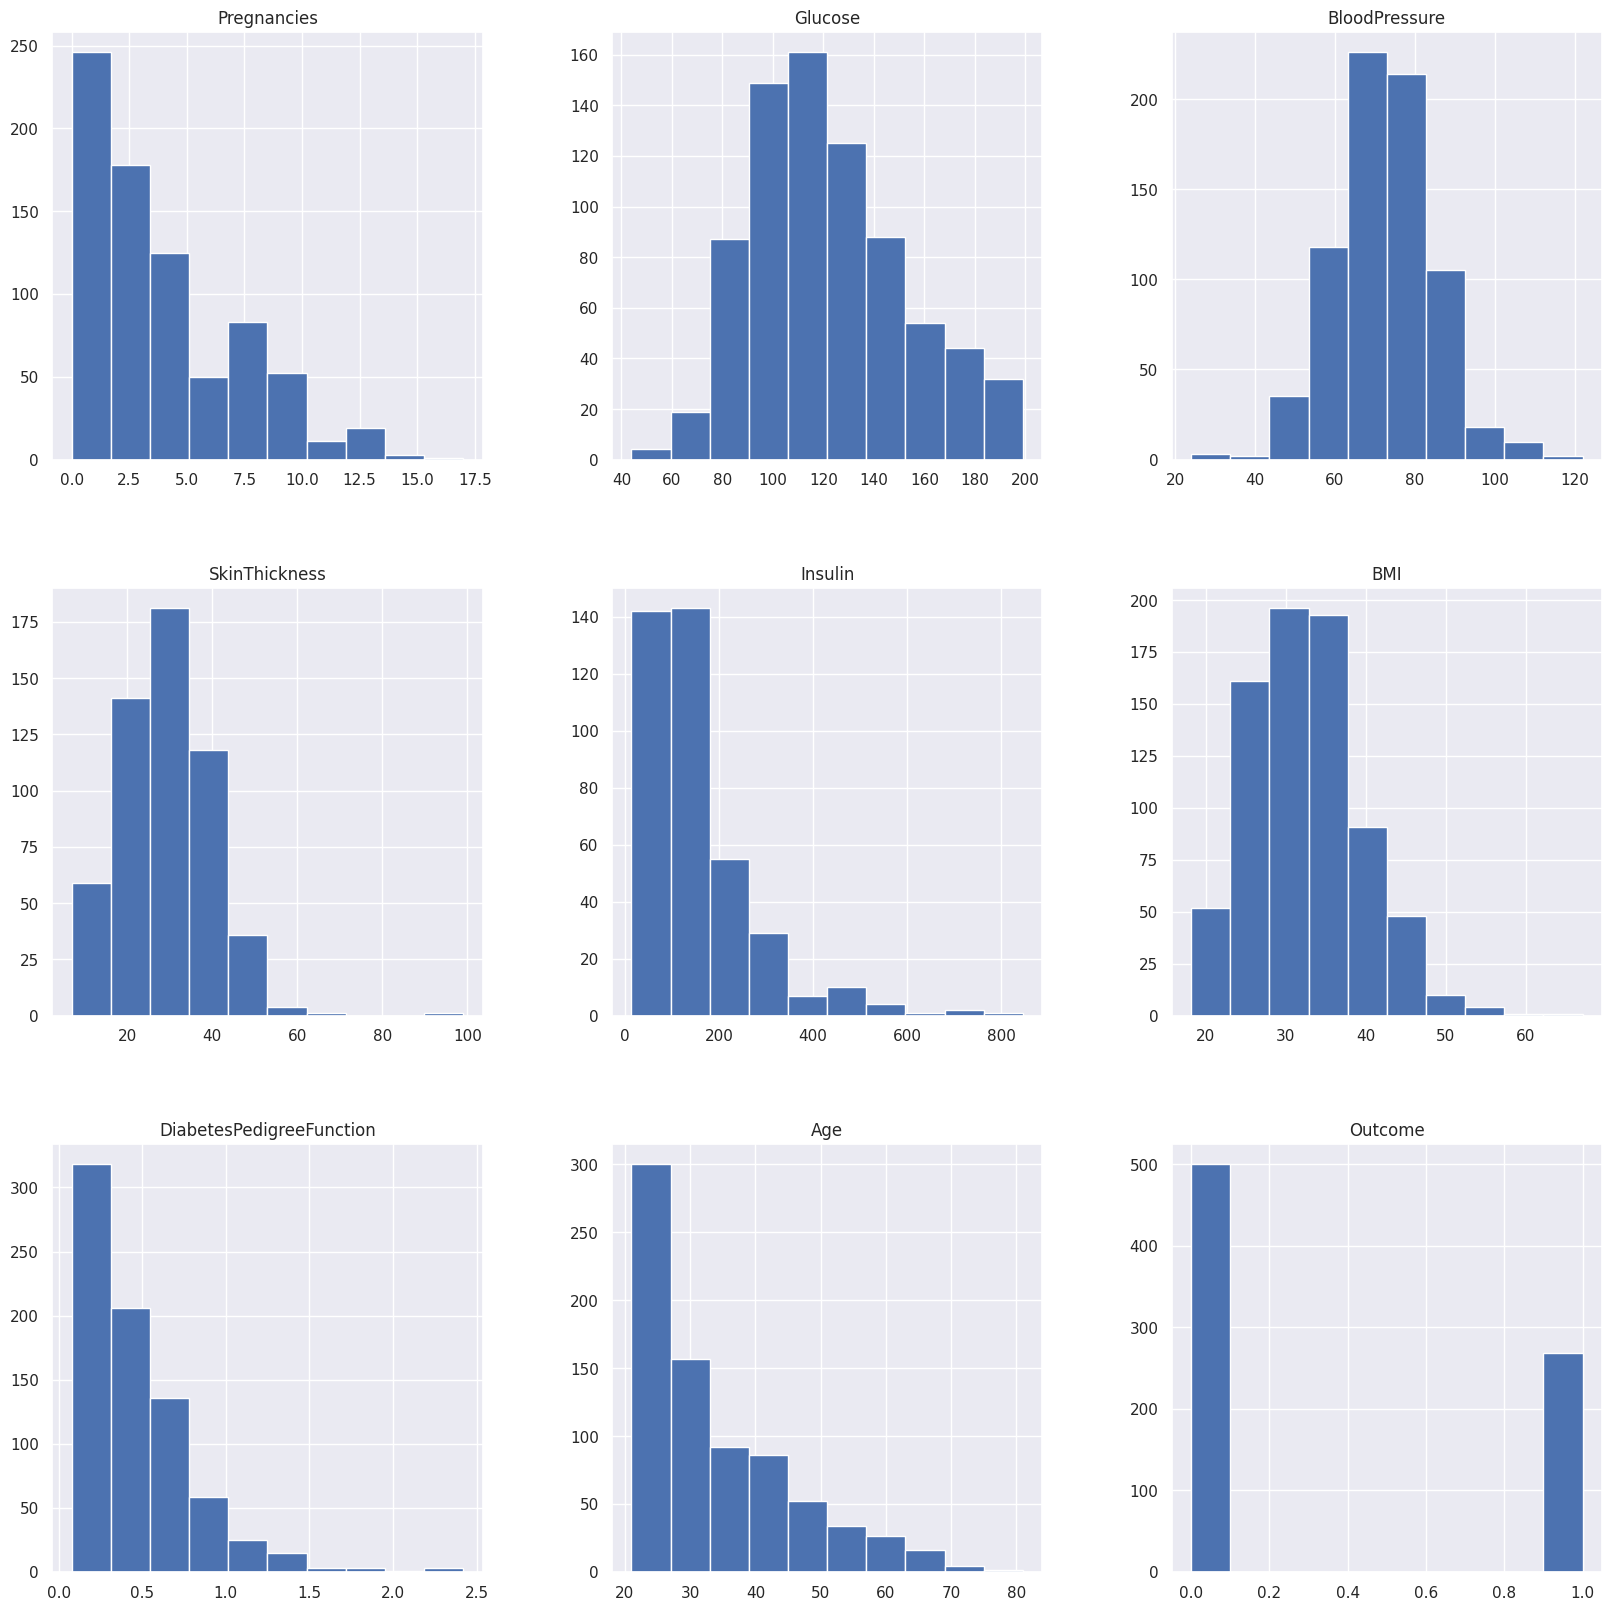

In [125]:
x = diabetes_data_df.hist(figsize = (20,20))

# Imputing NaN values

In [126]:
diabetes_data_df['Glucose'].fillna(diabetes_data_df['Glucose'].mean(), inplace = True)

diabetes_data_df['BloodPressure'].fillna(diabetes_data_df['BloodPressure'].mean(), inplace = True)

diabetes_data_df['SkinThickness'].fillna(diabetes_data_df['SkinThickness'].median(), inplace = True)

diabetes_data_df['Insulin'].fillna(diabetes_data_df['Insulin'].median(), inplace = True)

diabetes_data_df['BMI'].fillna(diabetes_data_df['BMI'].median(), inplace = True)

In [127]:
diabetes_data_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Plotting after removal removal of NaN values.

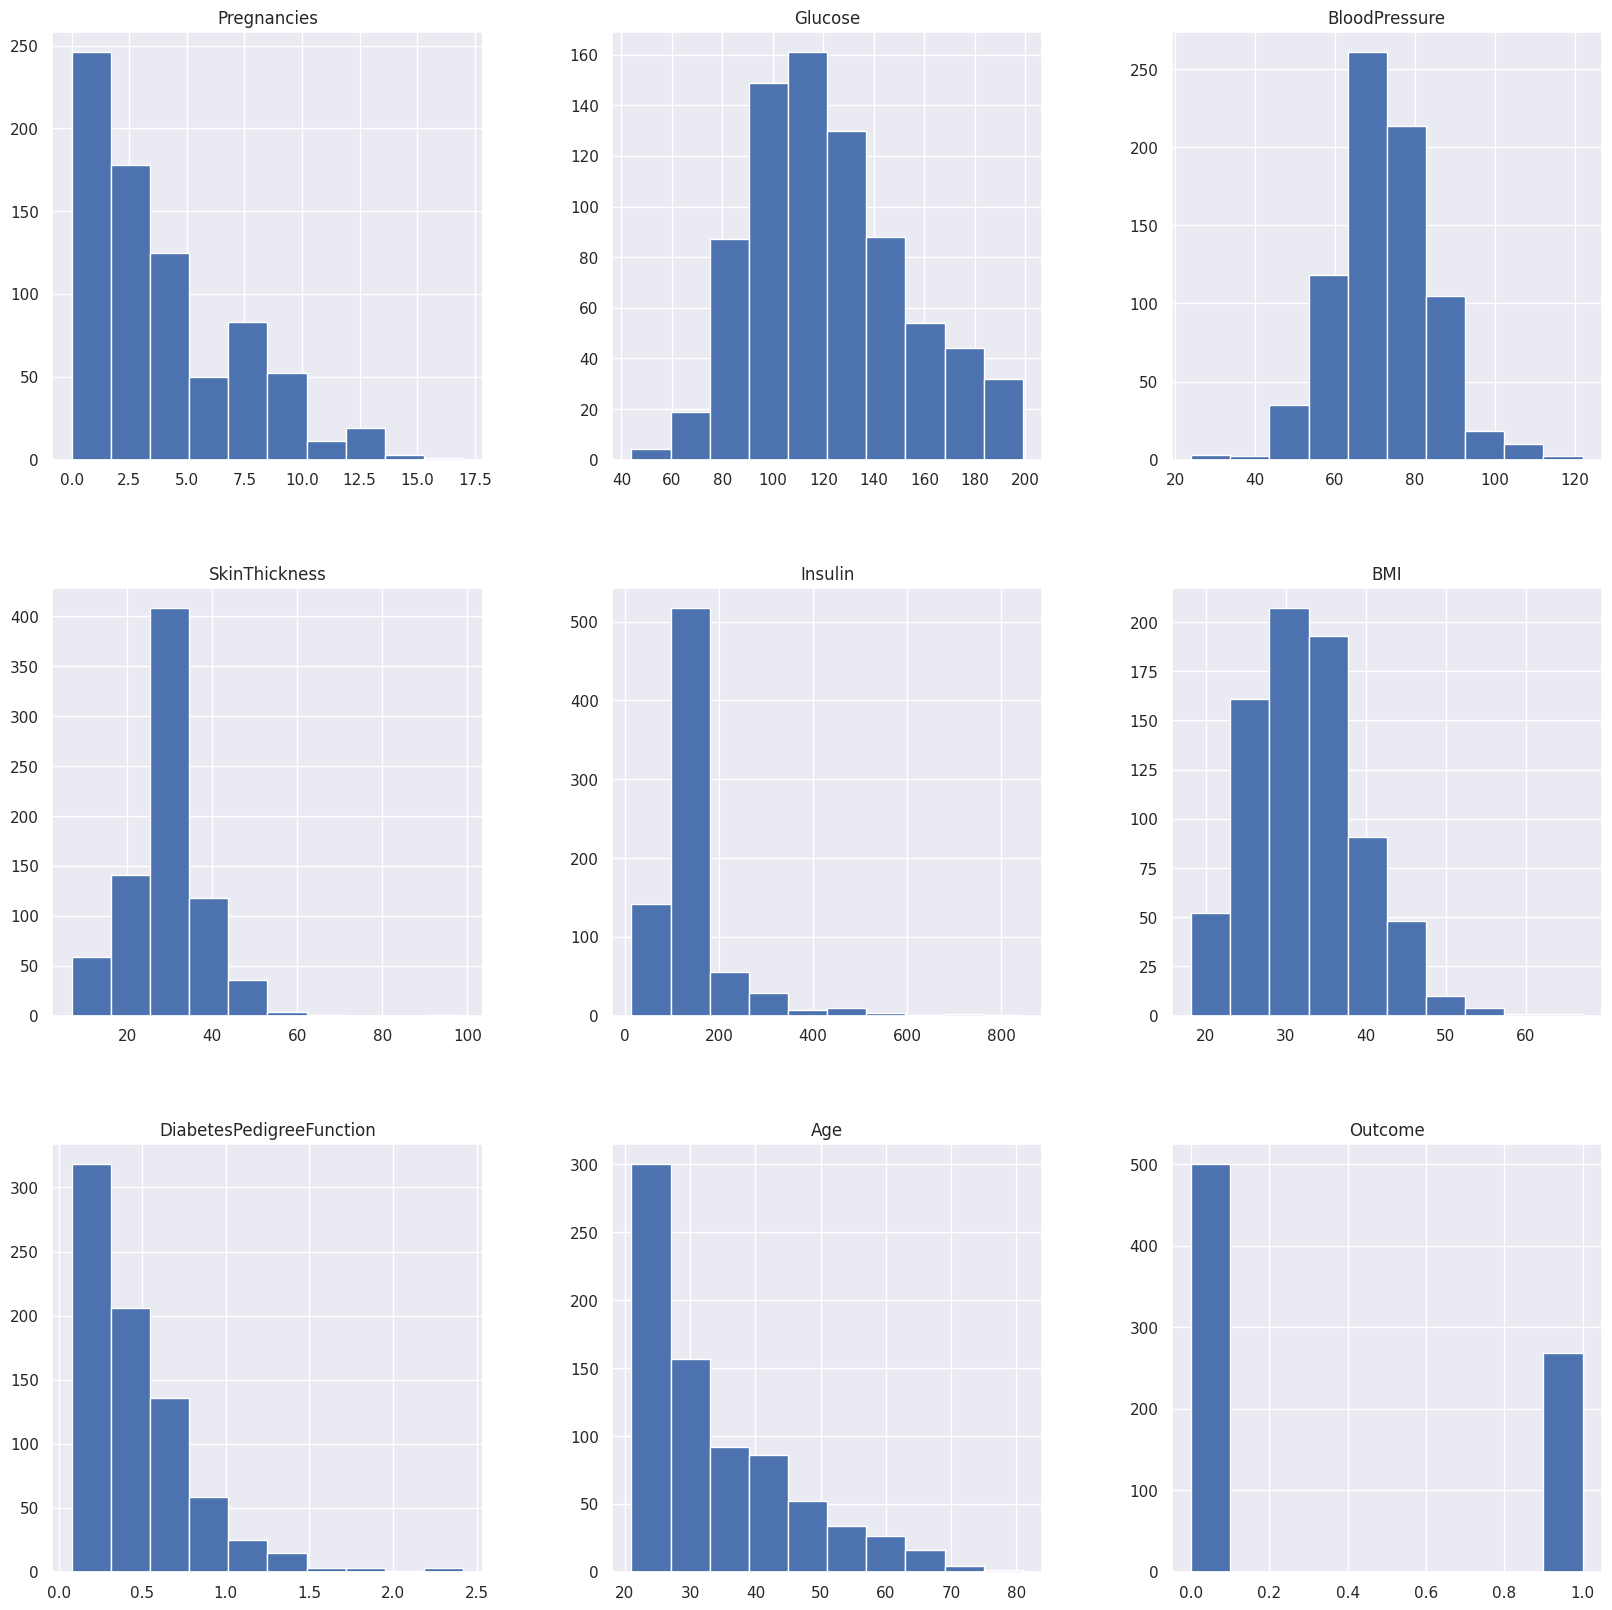

In [128]:
x = diabetes_data_df.hist(figsize = (20,20))

##### Heatmap map for unclean data

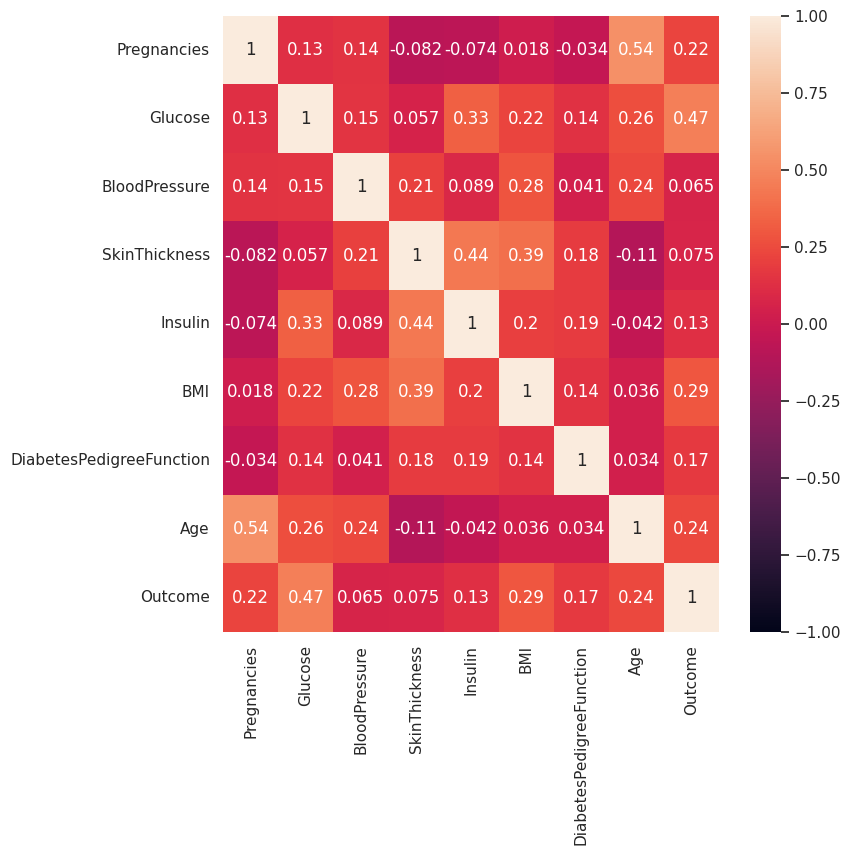

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = diabetes_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, vmin=-1.0,vmax=1.0,annot=True)
plt.yticks(rotation=0)
plt.show()

#### Heatmap for clean data

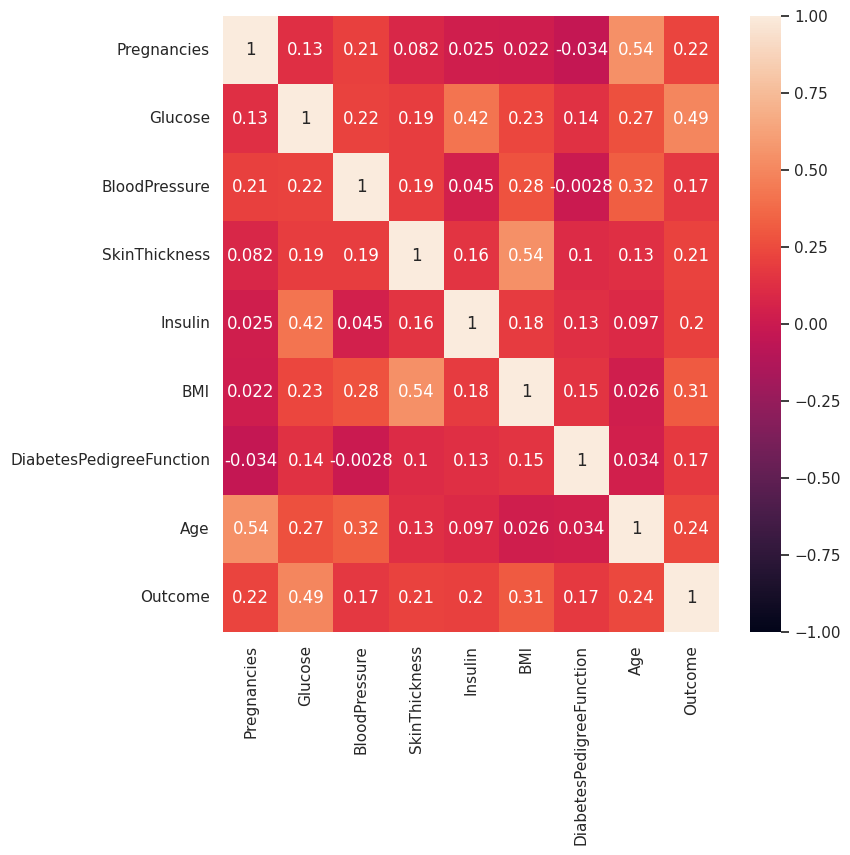

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = diabetes_data_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, vmin=-1.0,vmax=1.0,annot=True)
plt.yticks(rotation=0)
plt.show()

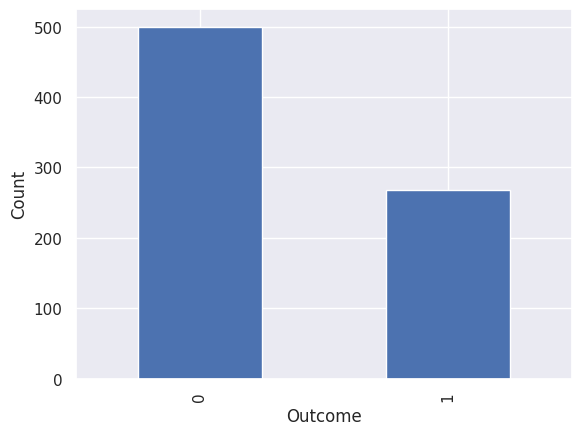

In [131]:
sns.set()
price_plot=diabetes_data_df['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

### From the above graph it is understood that the data is biased towards datapoints having the outcome value as 0 which  means that the non-diabetic patients were more in number as compared to that of the diabetic patients.

# Creating X & Y variables  for predictions

In [132]:
#Create X & Y
X = diabetes_data_df.values[:,0:-1]
Y = diabetes_data_df.values[:,-1]

In [133]:
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


# Scaling the X variables

As there are different feature variables in X, it can have a possibility of giving more importance to the variables having greater range and give less important to variables having small range which is not suitable.  
So to overcome this problem scaling is done on the all variables in X, as it will bring all the variables in a same range.  
This will help us to use distance metrics

In [134]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

# Train_test_splitting

In [135]:
from sklearn.model_selection import train_test_split  #<1000=in range of 80-20  &  >1000=in range of 70-30

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [136]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [137]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.]


In [138]:
np.set_printoptions(suppress= True)
Y_pred_prob=classifier.predict_proba(X_test)
Y_pred_prob

array([[0.44827731, 0.55172269],
       [0.75688559, 0.24311441],
       [0.51535939, 0.48464061],
       [0.91695223, 0.08304777],
       [0.89613953, 0.10386047],
       [0.95943873, 0.04056127],
       [0.92191381, 0.07808619],
       [0.6807507 , 0.3192493 ],
       [0.94801734, 0.05198266],
       [0.67531317, 0.32468683],
       [0.93659378, 0.06340622],
       [0.75260759, 0.24739241],
       [0.09033661, 0.90966339],
       [0.6594006 , 0.3405994 ],
       [0.88715984, 0.11284016],
       [0.27725245, 0.72274755],
       [0.22286449, 0.77713551],
       [0.9373859 , 0.0626141 ],
       [0.88787377, 0.11212623],
       [0.06741876, 0.93258124],
       [0.69708656, 0.30291344],
       [0.4660122 , 0.5339878 ],
       [0.64688223, 0.35311777],
       [0.82339729, 0.17660271],
       [0.83584167, 0.16415833],
       [0.28591516, 0.71408484],
       [0.68564365, 0.31435635],
       [0.55221681, 0.44778319],
       [0.53704386, 0.46295614],
       [0.18957112, 0.81042888],
       [0.

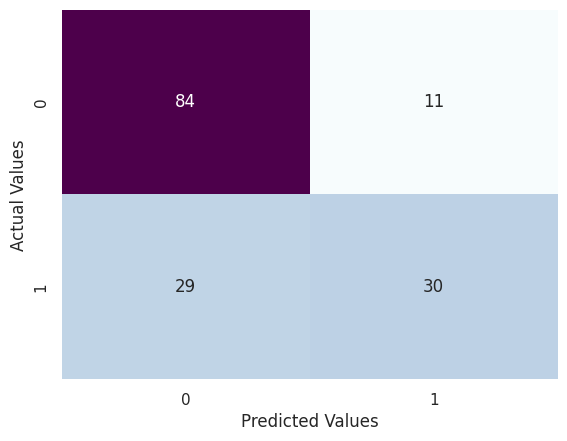

Classification report:
              precision    recall  f1-score   support

         0.0       0.74      0.88      0.81        95
         1.0       0.73      0.51      0.60        59

    accuracy                           0.74       154
   macro avg       0.74      0.70      0.70       154
weighted avg       0.74      0.74      0.73       154

Accuracy of the model:  0.7402597402597403


In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [140]:
print("Train Score(Log):",classifier.score(X_train,Y_train))
print("Test Score(Log):",classifier.score(X_test,Y_test))


Train Score(Log): 0.7736156351791531
Test Score(Log): 0.7402597402597403


In [141]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

Y_pred = model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

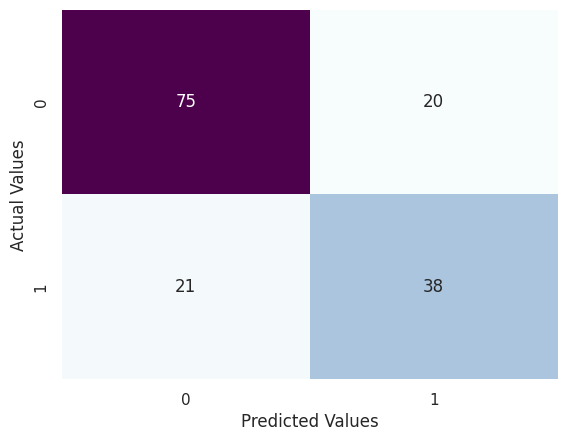

Classification report:
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.79        95
         1.0       0.66      0.64      0.65        59

    accuracy                           0.73       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.73      0.73      0.73       154

Accuracy of the model:  0.7337662337662337


In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [143]:
print("Train Score(Log):",model_DecisionTree.score(X_train,Y_train))
print("Test Score(Log):",model_DecisionTree.score(X_test,Y_test))


Train Score(Log): 1.0
Test Score(Log): 0.7337662337662337


As the Type II errors or we can say the patients who were diabetic but were detected as non - diabetic were still in no but still we can see the recall value was seemed to be inclined more towards "0" i.e. the patients who were non-diabetic.

# Optimization techniques - Handling Imbalanced data

In [144]:
diabetes_data_df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


### Oversampling

Outcome
0    500
1    450
Name: count, dtype: int64


<Axes: ylabel='count'>

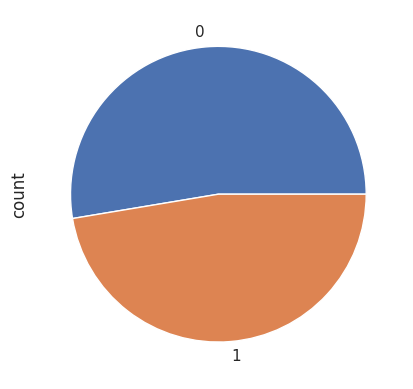

In [145]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = diabetes_data_df[diabetes_data_df.Outcome==0]
df_minority = diabetes_data_df[diabetes_data_df.Outcome==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=450,    # to match majority class
                                 random_state=10) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled.Outcome.value_counts())
df_upsampled.Outcome.value_counts().plot(kind="pie")

In [146]:
X=df_upsampled.values[:,:-1]
Y=df_upsampled.values[:,-1]

In [147]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
#X=scaler.fit_transform(X)
#print(X)

In [148]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [149]:
#from Logistic Regression.
from sklearn.linear_model import LogisticRegression
#create a model object
lr=LogisticRegression()
#fitting training data to the model
lr.fit(X_train,Y_train)

Y_pred=lr.predict(X_test)
print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

[1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]


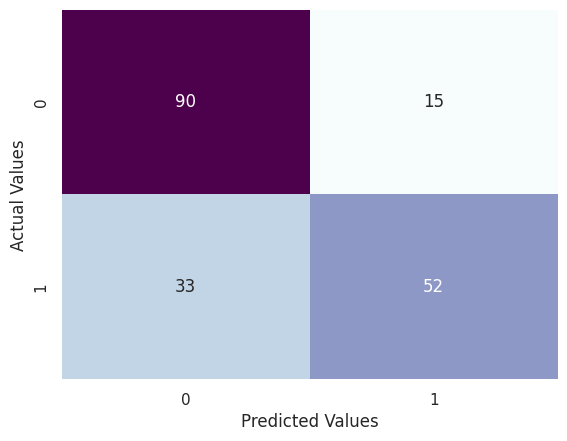

Classification report:
              precision    recall  f1-score   support

         0.0       0.73      0.86      0.79       105
         1.0       0.78      0.61      0.68        85

    accuracy                           0.75       190
   macro avg       0.75      0.73      0.74       190
weighted avg       0.75      0.75      0.74       190

Accuracy of the model:  0.7473684210526316


In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [151]:
#predicting using the Decision Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10)


#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

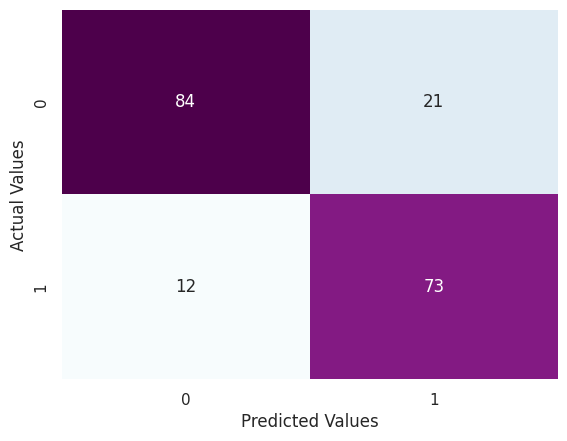

Classification report:
              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84       105
         1.0       0.78      0.86      0.82        85

    accuracy                           0.83       190
   macro avg       0.83      0.83      0.83       190
weighted avg       0.83      0.83      0.83       190

Accuracy of the model:  0.8263157894736842


In [152]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### Undersampling

Outcome
1    268
0    250
Name: count, dtype: int64


<Axes: ylabel='count'>

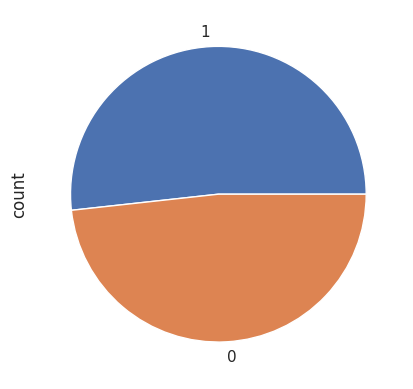

In [153]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = diabetes_data_df[diabetes_data_df.Outcome==0]
df_minority = diabetes_data_df[diabetes_data_df.Outcome==1]

# Upsample minority class
df_majority_downsampled = resample(df_majority,
                                 replace=True,     # sample with replacement
                                 n_samples=250,    # to match majority class
                                 random_state=10) # reproducible results

# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

# Display new class counts
print(df_downsampled.Outcome.value_counts())
df_downsampled.Outcome.value_counts().plot(kind="pie")

In [154]:
X=df_downsampled.values[:,:-1]
Y=df_downsampled.values[:,-1]

In [155]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
#X=scaler.fit_transform(X)
#print(X)

In [156]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [157]:
#from Logistic Regression.
from sklearn.linear_model import LogisticRegression
#create a model object
lr=LogisticRegression()
#fitting training data to the model
lr.fit(X_train,Y_train)

Y_pred=lr.predict(X_test)
print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

[0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 0.]


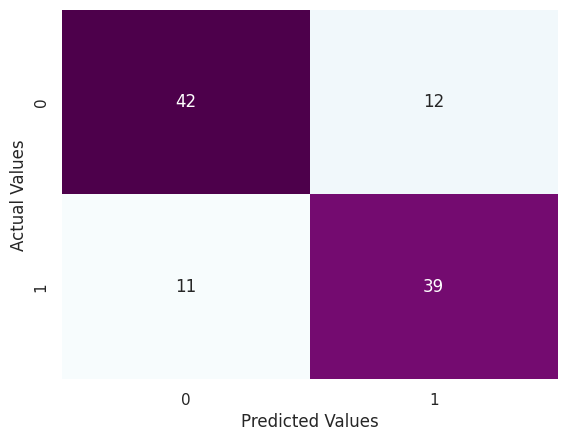

Classification report:
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79        54
         1.0       0.76      0.78      0.77        50

    accuracy                           0.78       104
   macro avg       0.78      0.78      0.78       104
weighted avg       0.78      0.78      0.78       104

Accuracy of the model:  0.7788461538461539


In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [159]:
#predicting using the Decision Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10)


#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

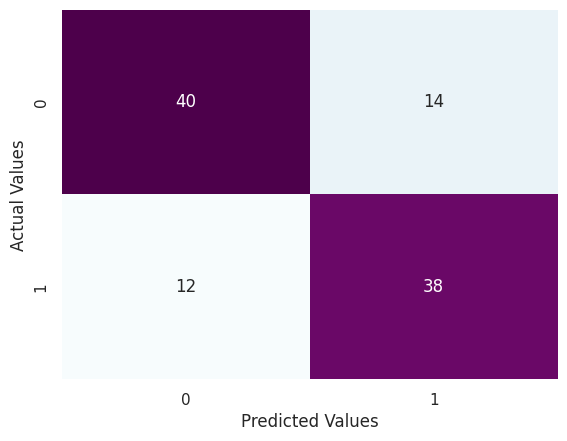

Classification report:
              precision    recall  f1-score   support

         0.0       0.77      0.74      0.75        54
         1.0       0.73      0.76      0.75        50

    accuracy                           0.75       104
   macro avg       0.75      0.75      0.75       104
weighted avg       0.75      0.75      0.75       104

Accuracy of the model:  0.75


In [160]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

#### SMOTE

In [161]:
import imblearn

In [162]:
X=diabetes_data_df.values[:,:-1]
Y=diabetes_data_df.values[:,-1]

In [163]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
#X=scaler.fit_transform(X)
#print(X)

In [164]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [165]:
print(len(Y_train[Y_train==1])) # minority
print(len(Y_train[Y_train==0])) #majority


209
405


In [166]:
?sm.fit_resample

In [167]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))

# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))

print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  209
Before OverSampling, counts of label '0':  405
After OverSampling, the shape of train_X:  (810, 8)
After OverSampling, the shape of train_y:  (810,)
After OverSampling, counts of label '1':  405
After OverSampling, counts of label '0':  405


In [168]:
#from Logistic Regression.
from sklearn.linear_model import LogisticRegression
#create a model object
lr=LogisticRegression()
#fitting training data to the model
lr.fit(X_train_res,Y_train_res)

Y_pred=lr.predict(X_test)
print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

[1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0.]


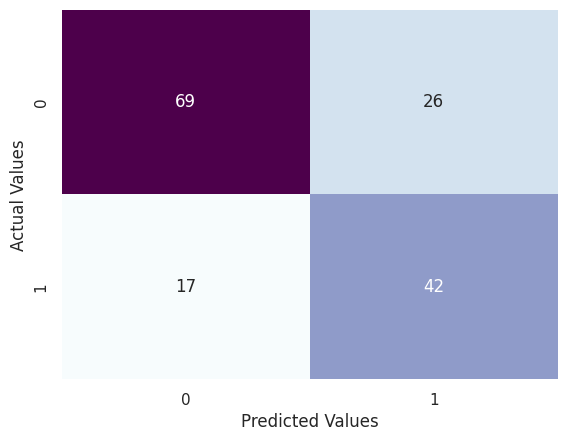

Classification report:
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        95
         1.0       0.62      0.71      0.66        59

    accuracy                           0.72       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.72      0.72       154

Accuracy of the model:  0.7207792207792207


In [169]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [170]:
#predicting using the Decision Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10)


#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

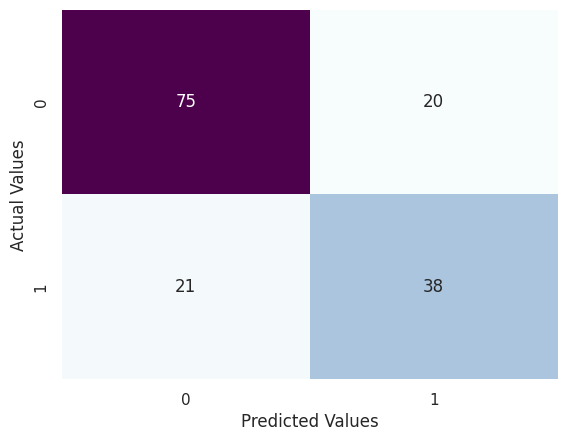

Classification report:
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.79        95
         1.0       0.66      0.64      0.65        59

    accuracy                           0.73       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.73      0.73      0.73       154

Accuracy of the model:  0.7337662337662337


In [171]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)